# LIBRAS Classification Based on Hand Landmarks Coordinates

This Jupyter Notebook includes code for training and evaluating various `machine learning` models using our LIBRAS (Brazilian Sign Language) dataset.


**Training Results** (accuracy on test set):
- `KNN` $=$ 99.88%
- `Neural Network` $=$ 99.77%
- `Random Forest` $=$ 99.75%
- `SVM` $=$ 99.62%
- `Logistic Regression` $=$ 98.19%

In [3]:
# utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# models
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Load Data

Before training the machine learning models, it is necessary to load the dataset from a CSV file. The dataset contains hand landmarks data for LIBRAS classification.


The data format should be as follows: (N $\times$ 64)

| label |   x0  |   y0   |   z0  | $\dots$ |  x20  |  y20  |  z20  |
|-------|-------|-------|-------|---------|-------|-------|-------|
| char  | float | float | float | $\dots$ | float | float | float |


21 different labels (all static latters in LIBRAS)

| A | B | C | D | E | F | G | I | L | M | N | O | P | Q | R | S | T | U | V | W | Y |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|

In [5]:
# Load the CSV file
df = pd.read_csv('./dataset/data.csv')
df.head()

,label,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,A,0.173913,1.0,1.000000,0.515528,0.980645,0.510204,0.888199,0.696774,0.408163,...,0.551020,0.111801,0.090323,0.142857,0.124224,0.341935,0.387755,0.080745,0.406452,0.653061
1,A,0.130435,1.0,1.000000,0.478261,0.924051,0.447368,0.832298,0.645570,0.315789,...,0.578947,0.080745,0.126582,0.184211,0.111801,0.348101,0.500000,0.080745,0.354430,0.815789
2,A,0.141935,1.0,1.000000,0.490323,0.918239,0.564103,0.832258,0.635220,0.435897,...,0.461538,0.096774,0.125786,0.102564,0.122581,0.358491,0.461538,0.077419,0.377358,0.846154
3,A,0.138365,1.0,0.974359,0.515723,0.901840,0.564103,0.823899,0.595092,0.487179,...,0.589744,0.100629,0.104294,0.128205,0.125786,0.331288,0.435897,0.075472,0.361963,0.794872
4,A,0.156250,1.0,1.000000,0.531250,0.896341,0.575000,0.868750,0.615854,0.475000,...,0.525000,0.106250,0.115854,0.125000,0.143750,0.341463,0.450000,0.106250,0.378049,0.800000


In [6]:
assert df.shape == (53760, 64)

In [7]:
# The CSV file has target variable in column 0 and the other features in columns 1 to n-1
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split the data into training, validation and testing sets
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.1, random_state=10)

# One Hot Encoding
y_train = pd.get_dummies(y_train_cat).values
y_test = pd.get_dummies(y_test_cat).values

In [8]:
# shapes
print('   Train       Test')
print(np.shape(X_train), np.shape(X_test))
print(np.shape(y_train), np.shape(y_test))

   Train       Test
(48384, 63) (5376, 63)
(48384, 21) (5376, 21)


$\;$

## Neural Network

In [9]:
# input and output size
n_features = 63
n_classes = 21

# Build the neural network
nn = Sequential()
nn.add(Dense(units=32, activation='sigmoid', input_dim=n_features))
nn.add(Dense(units=n_classes, activation='softmax'))

In [10]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 21)                693       
                                                                 
Total params: 2741 (10.71 KB)
Trainable params: 2741 (10.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = nn.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/25
1512/1512 [==============================] - 10s 3ms/step - loss: 1.9275 - accuracy: 0.5790 - val_loss: 1.0262 - val_accuracy: 0.7799
Epoch 2/25
1512/1512 [==============================] - 6s 4ms/step - loss: 0.7071 - accuracy: 0.8592 - val_loss: 0.5101 - val_accuracy: 0.8782
Epoch 3/25
1512/1512 [==============================] - 6s 4ms/step - loss: 0.4080 - accuracy: 0.8996 - val_loss: 0.3384 - val_accuracy: 0.9051
Epoch 4/25
1512/1512 [==============================] - 6s 4ms/step - loss: 0.2842 - accuracy: 0.9235 - val_loss: 0.2513 - val_accuracy: 0.9304
Epoch 5/25
1512/1512 [==============================] - 8s 5ms/step - loss: 0.2162 - accuracy: 0.9409 - val_loss: 0.1969 - val_accuracy: 0.9464
Epoch 6/25
1512/1512 [==============================] - 6s 4ms/step - loss: 0.1750 - accuracy: 0.9523 - val_loss: 0.1638 - val_accuracy: 0.9561
Epoch 7/25
1512/1512 [==============================] - 7s 4ms/step - loss: 0.1465 - accuracy: 0.9613 - val_loss: 0.1405 - val_accuracy

In [13]:
loss, accuracy = nn.evaluate(X_test, y_test)

168/168 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9978


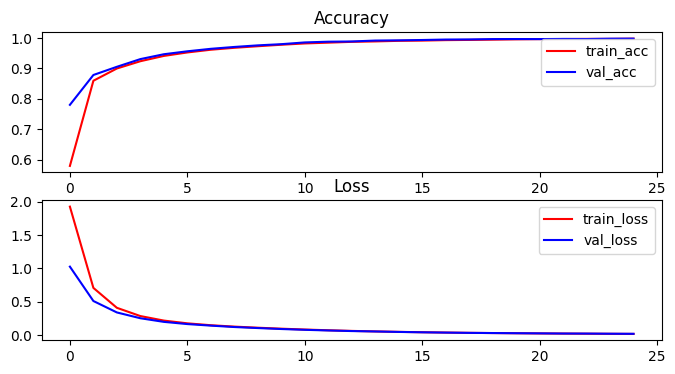

In [14]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(8, 4)

ax[0].plot(history.history['accuracy'], color='red', label='train_acc')
ax[0].plot(history.history['val_accuracy'], color='blue', label='val_acc')
ax[0].set_title("Accuracy")
ax[0].legend()

ax[1].plot(history.history['loss'], color='red', label='train_loss')
ax[1].plot(history.history['val_loss'], color='blue', label='val_loss')
ax[1].set_title("Loss")
ax[1].legend()

plt.show()

In [15]:
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

loss: 0.01751793548464775
accuracy: 0.9977678656578064


In [16]:
nn.save('./models/nn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


$\;$

## Random Forest

In [17]:
rf_model = RandomForestClassifier(n_estimators=7)

In [18]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy: {accuracy}")

accuracy: 0.9975818452380952


In [21]:
# save
joblib.dump(rf_model, './models/rf_model.joblib', compress=False)

['./models/rf_model.joblib']

$\;$

## Logistic Regression

In [22]:
logreg_model = LogisticRegression(max_iter=100)

In [23]:
logreg_model.fit(X_train, y_train_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logreg_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test_cat, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9819568452380952


In [26]:
# save
joblib.dump(logreg_model, './models/logreg_model.joblib', compress=False)

['./models/logreg_model.joblib']

$\;$

## SVM

In [27]:
svm_model = SVC(kernel='linear', C=5)

In [28]:
svm_model.fit(X_train, y_train_cat)

SVC(C=5, kernel='linear')

In [29]:
y_pred = svm_model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test_cat, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9962797619047619


In [31]:
# save
joblib.dump(svm_model, './models/svm_model.joblib', compress=False)

['./models/svm_model.joblib']

$\;$

## KNN

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.9988839285714286


In [36]:
# save
joblib.dump(knn_model, './models/knn_model.joblib', compress=0)

['./models/knn_model.joblib']


# :)